In [58]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import itertools

import os, re, glob
from osgeo import gdal

In [53]:
dirpath = "/global/scratch/users/ann_scheliga/aux_dam_datasets/Landsat8/"

**Overview of NDWI**

Normalized difference water index (NDWI) from McFEETERS 1996
* NDWI = (Green - NIR)/(Green + NIR)
    
Landsat 8 bands from USGS LPDAAC documentation: https://lpdaac.usgs.gov/products/hlsl30v002/
- Green = Band 3
- NIR = Band 5

**Data download steps**
1) Get shell script from NASA Earthdata interface. This is where you specify temporal and spatial bounds.
2) Shorten shell script to just desired bands. Use `scripts/filter_USGS_landsat_download.py`
3) Run the shortened shell script. Recommended to put the script in its own folder.
4) Run gdal code from Alex Georges to combine files into one. `scripts/combine_USGS_landsat.py`

In [65]:
mosaic_images = [file for file in os.listdir(dirpath) if file.startswith('landsat')]

In [67]:
test_mosaic = rxr.open_rasterio(dirpath+mosaic_images[0])
test_mosaic

<xarray.DataArray (band: 1, y: 6992, x: 10326)>
[72199392 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3e+05 3e+05 3.001e+05 ... 6.097e+05 6.098e+05
  * y            (y) float64 4.2e+06 4.2e+06 4.2e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int64 0
Attributes: (12/36)
    ACCODE:                    *
    add_offset:                0.0
    AREA_OR_POINT:             Area
    arop_ave_xshift(meters):   *
    arop_ave_yshift(meters):   *
    arop_ncp:                  *
    ...                        ...
    TIRS_SSM_MODEL:            *
    TIRS_SSM_POSITION_STATUS:  *
    ULX:                       *
    ULY:                       *
    USGS_SOFTWARE:             LPGS_16.1.0
    _FillValue:                -9999

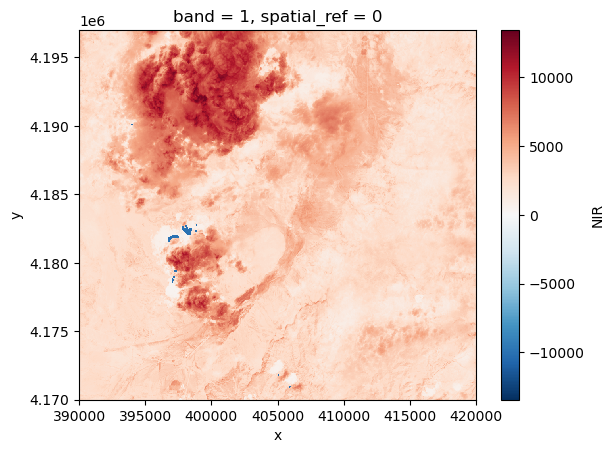

In [72]:
test_mosaic.isel(x=np.arange(3000,4000),y=np.arange(100,1000)).plot()